In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population/Electric_Vehicle_Population_Data.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/electric-vehicle-population/Electric_Vehicle_Population_Data.csv')
df.sample(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
148633,5YJ3E1EA1P,Skagit,Anacortes,WA,98221.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,40.0,255081473,POINT (-122.61214 48.51748),PUGET SOUND ENERGY INC,5.305794e+10
213987,7SAYGDEE5P,Whatcom,Ferndale,WA,98248.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,42.0,245502008,POINT (-122.5945 48.84787),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
111043,JTMABABA7R,Clark,Vancouver,WA,98661.0,2024,SUBARU,SOLTERRA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,49.0,273788868,POINT (-122.62934 45.63201),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
75404,1N4AZ1CP2L,Clark,Battle Ground,WA,98604.0,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,149.0,0.0,18.0,122305445,POINT (-122.5331 45.78092),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
103416,JN1AZ0CP7C,King,Seattle,WA,98115.0,2012,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,46.0,240780053,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [3]:
df.fillna(0.00, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235692 non-null  object 
 2   City                                               235692 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235692 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [5]:
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].mean()).round(2)
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mean()).round(2)
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].mean()).round(2)
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mean()).round(2)
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(df['2020 Census Tract'].mean()).round(2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235692 non-null  object 
 2   City                                               235692 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235692 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [7]:
df.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,235692,235692,235692,235692,235692.000000,235692.000000,235692,235692,235692,235692,235692.000000,235692.000000,235692.000000,2.356920e+05,235692,235692,2.356920e+05
unique,13763,213,789,48,NaN,NaN,46,171,2,3,NaN,NaN,NaN,NaN,958,77,NaN
top,7SAYGDEE6P,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,NaN,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,1190,118711,37410,235198,NaN,NaN,101080,49253,186998,139761,NaN,NaN,NaN,NaN,5824,85298,NaN
mean,NaN,NaN,NaN,NaN,98176.406811,2021.406658,NaN,NaN,NaN,NaN,46.255503,787.148079,28.818988,2.353127e+08,NaN,NaN,5.297999e+10
std,NaN,NaN,NaN,NaN,2548.388825,2.991908,NaN,NaN,NaN,NaN,84.041354,7177.126712,14.947483,6.799098e+07,NaN,NaN,1.532755e+09
min,NaN,NaN,NaN,NaN,0.000000,2000.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.385000e+03,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,98052.000000,2020.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,17.000000,2.053457e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98126.000000,2023.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,32.000000,2.522795e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98374.000000,2024.000000,NaN,NaN,NaN,NaN,38.000000,0.000000,42.000000,2.696401e+08,NaN,NaN,5.305307e+10


In [8]:
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Data Vizualtizaion 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
cols = ['State','Model Year',
       'Make', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Base MSRP', 'Legislative District']

# Count Plot

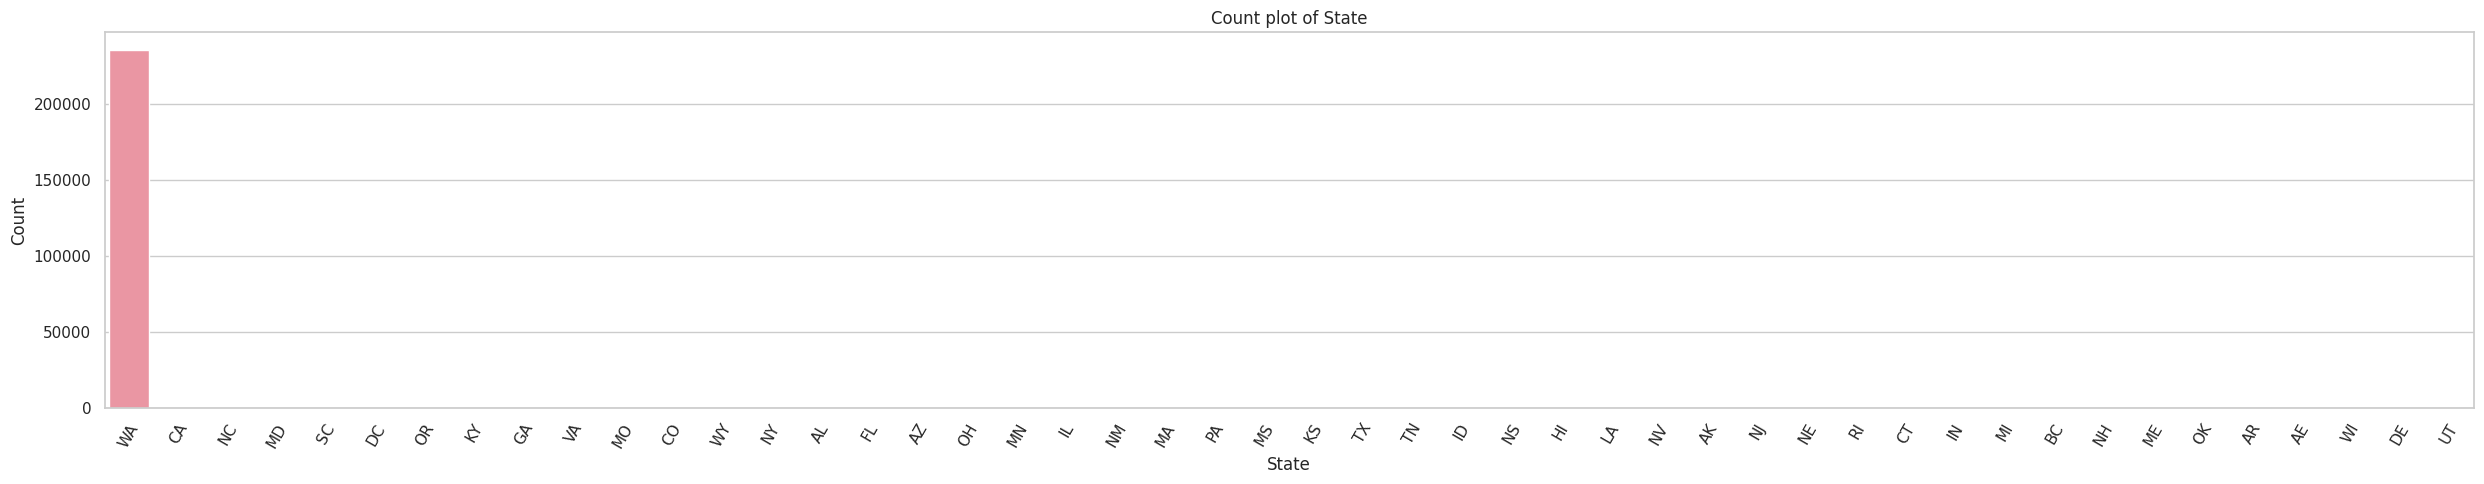

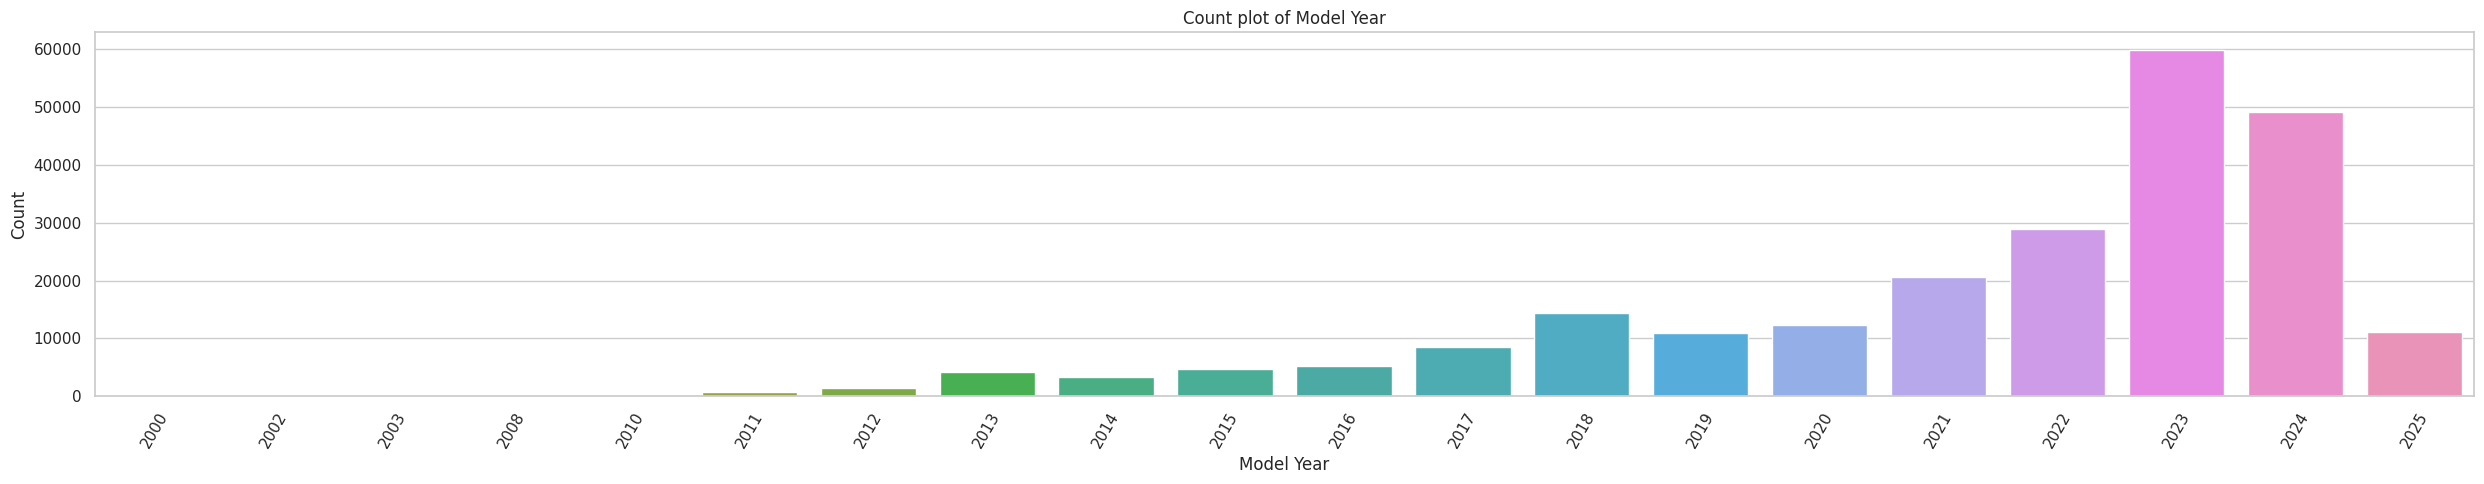

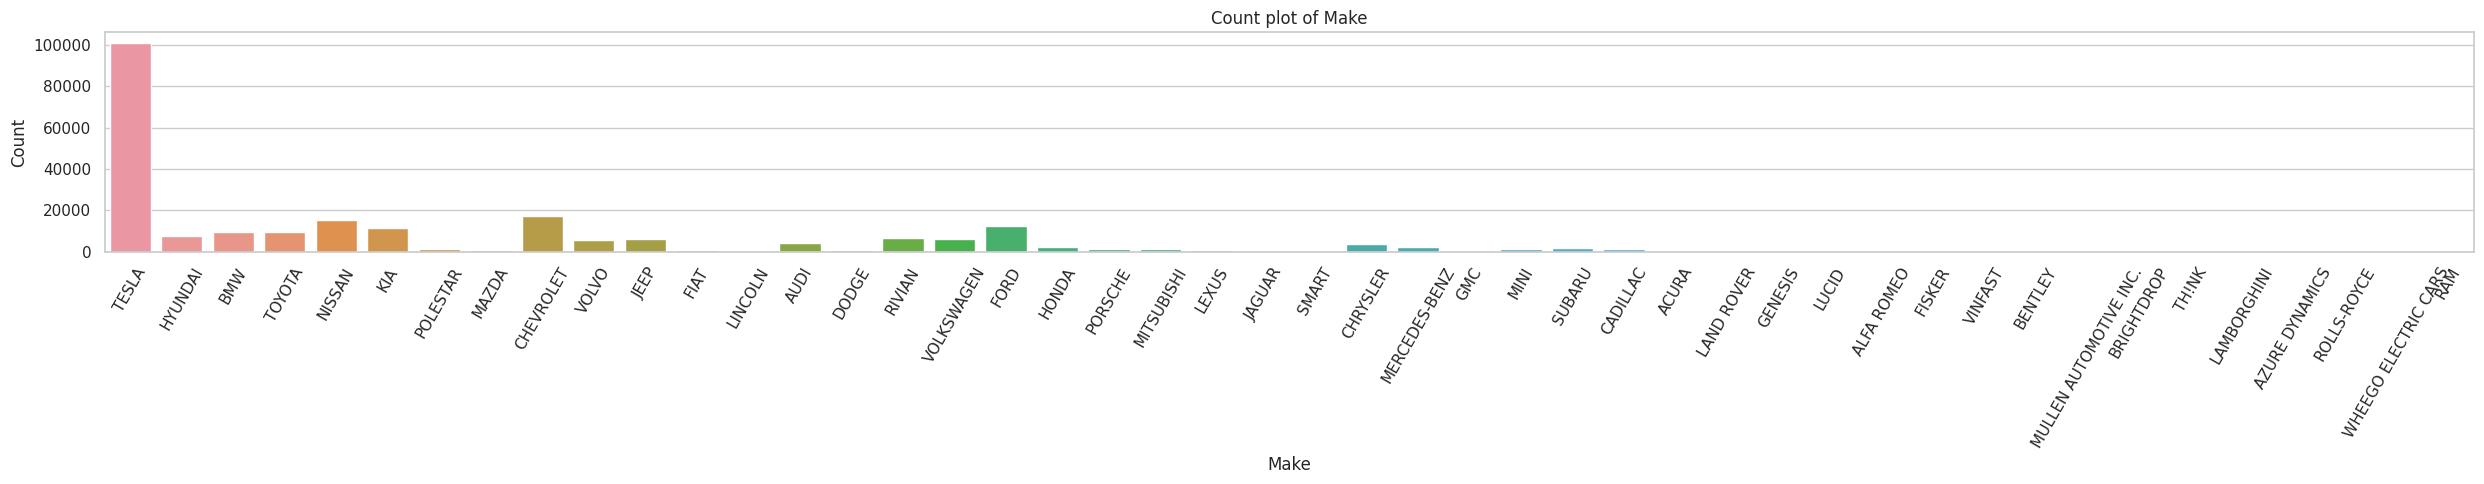

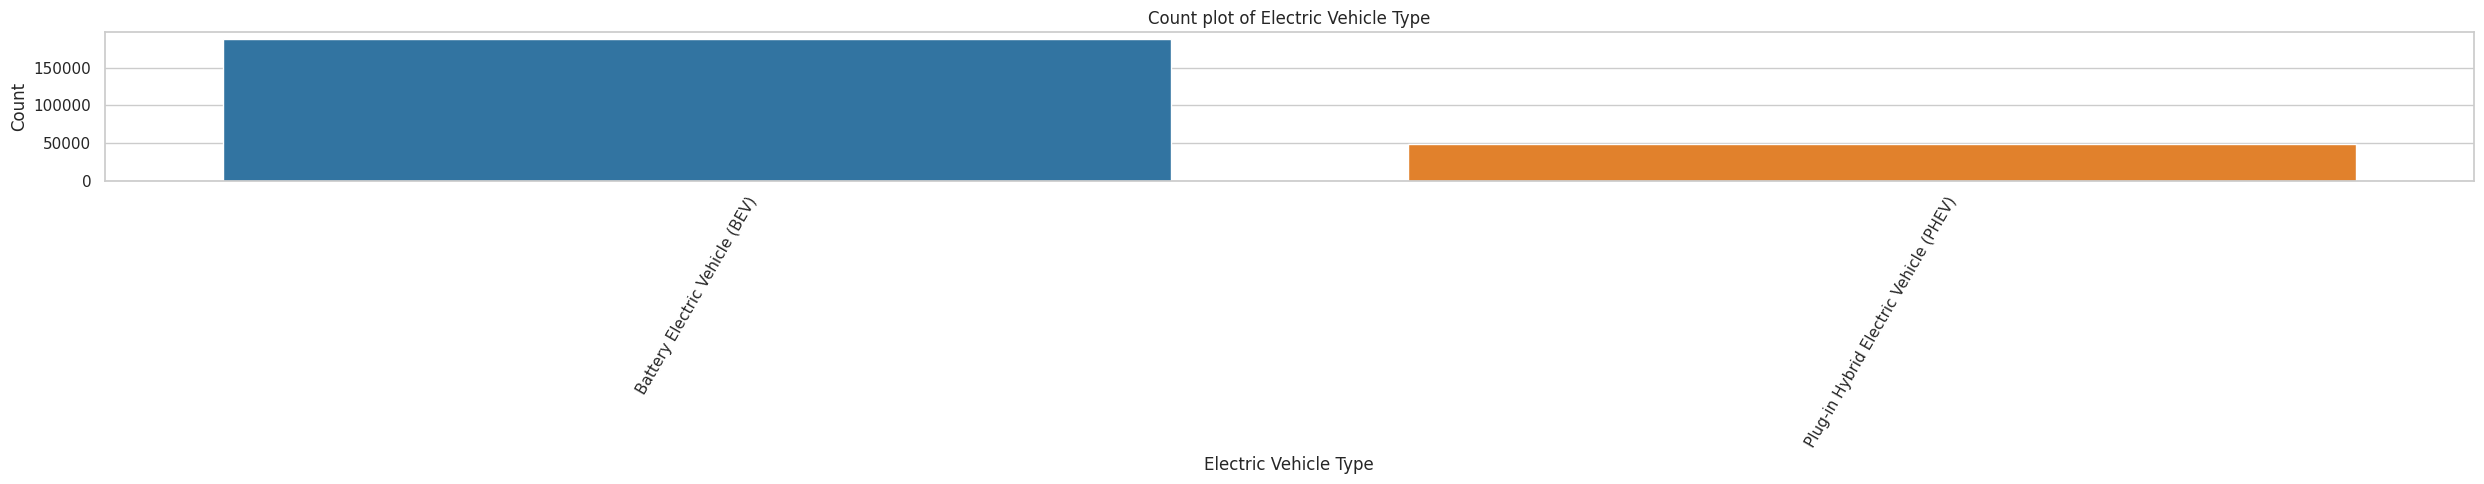

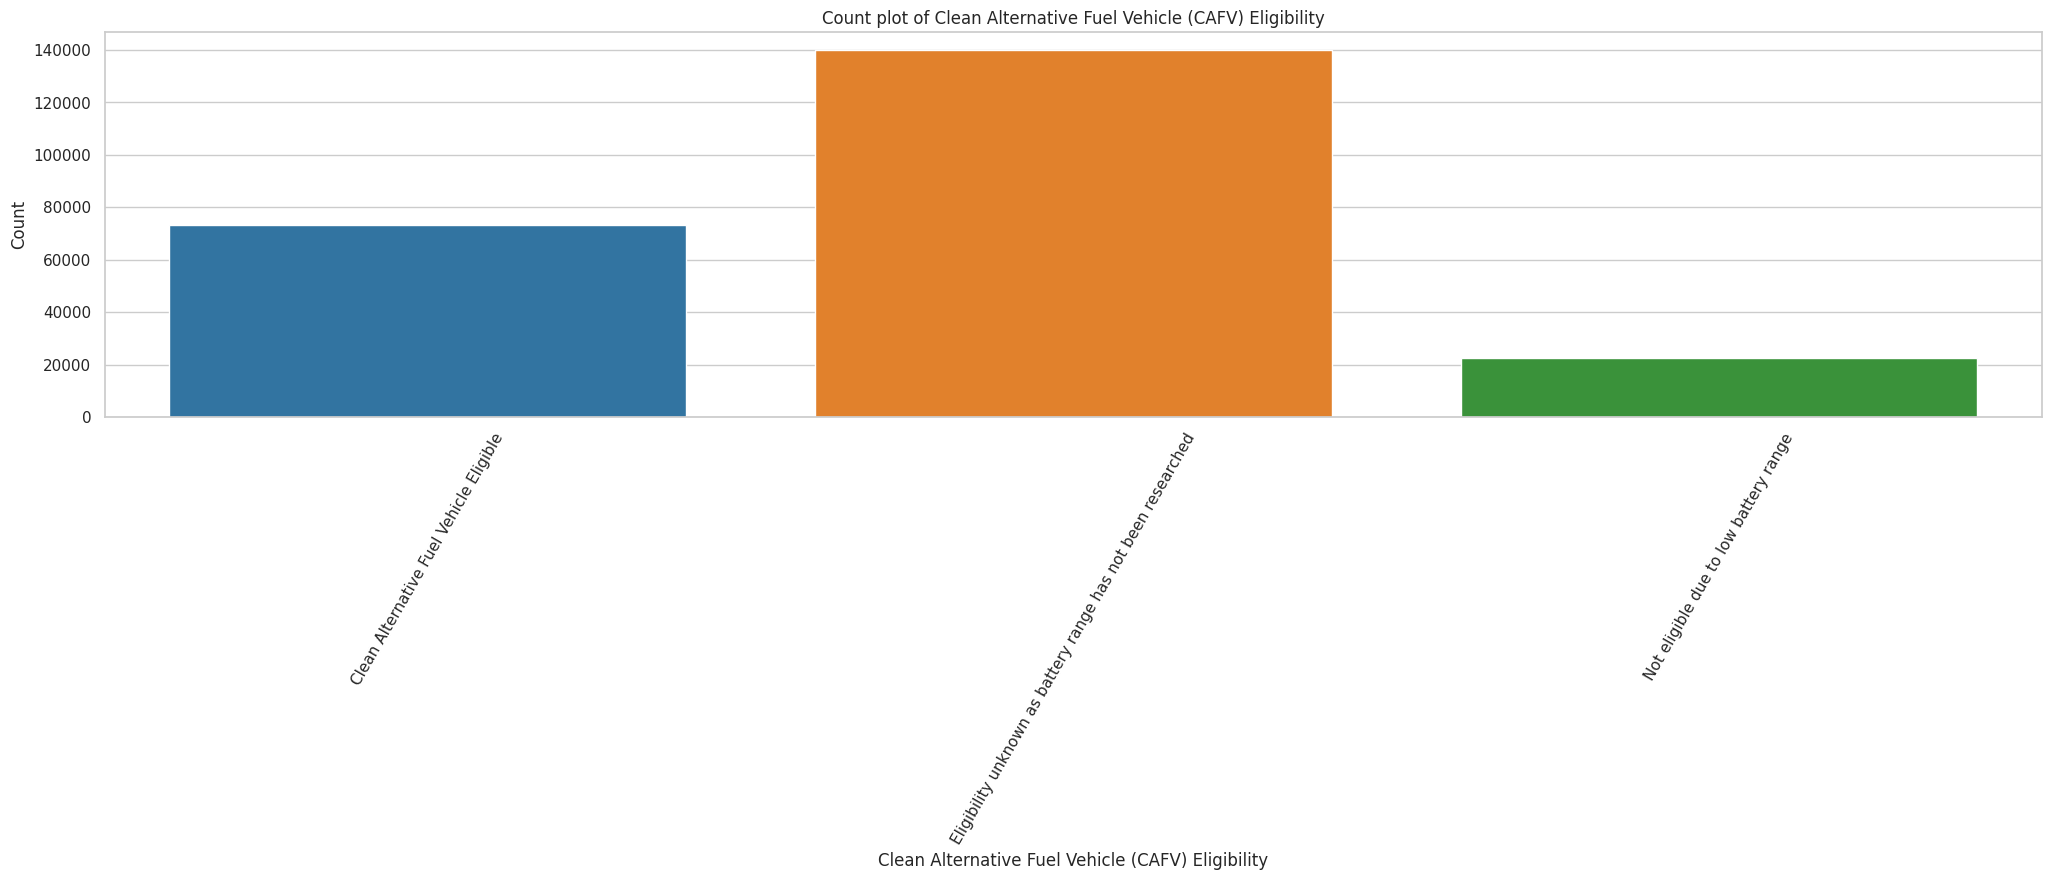

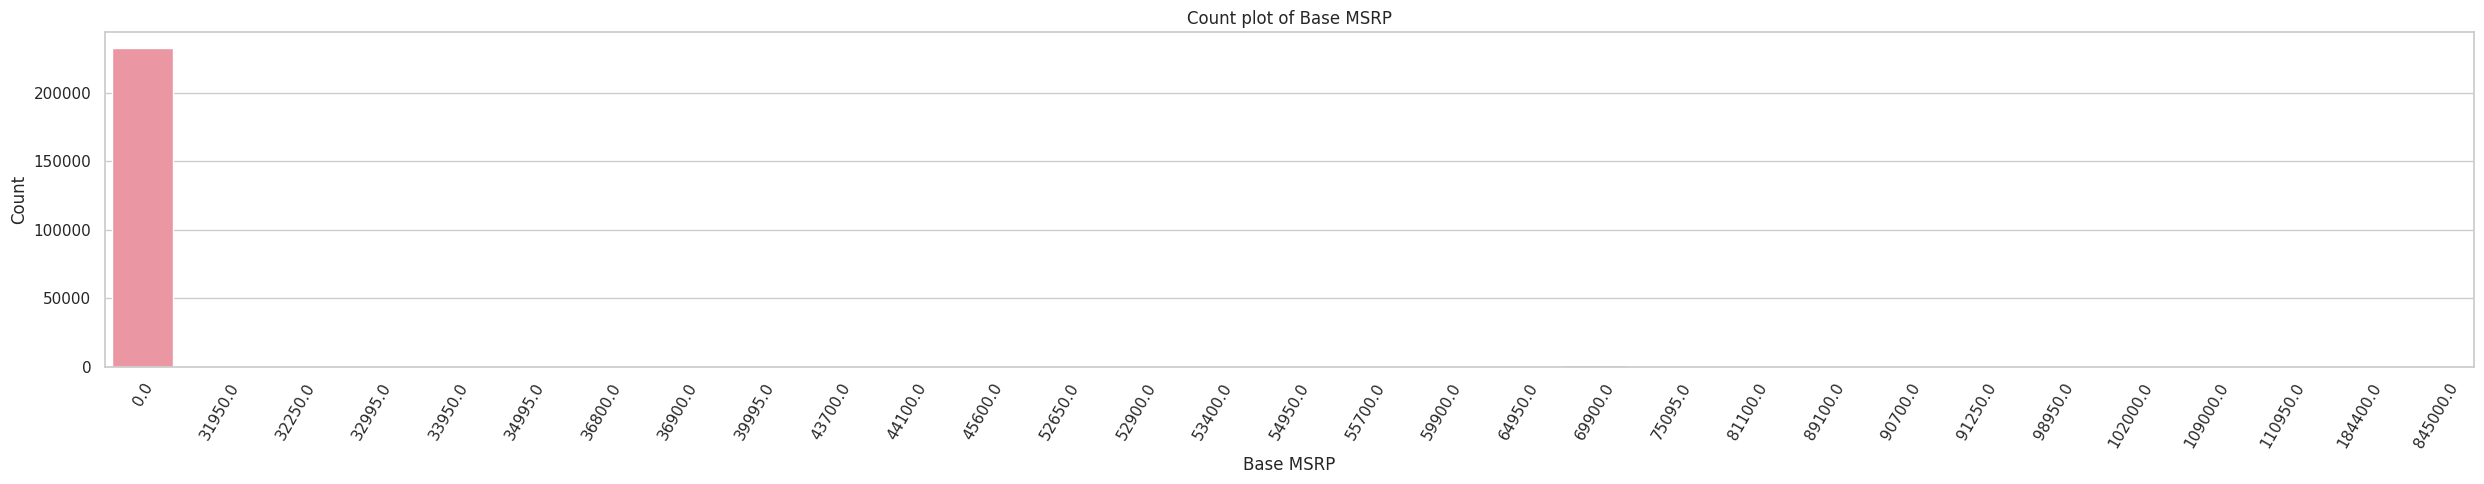

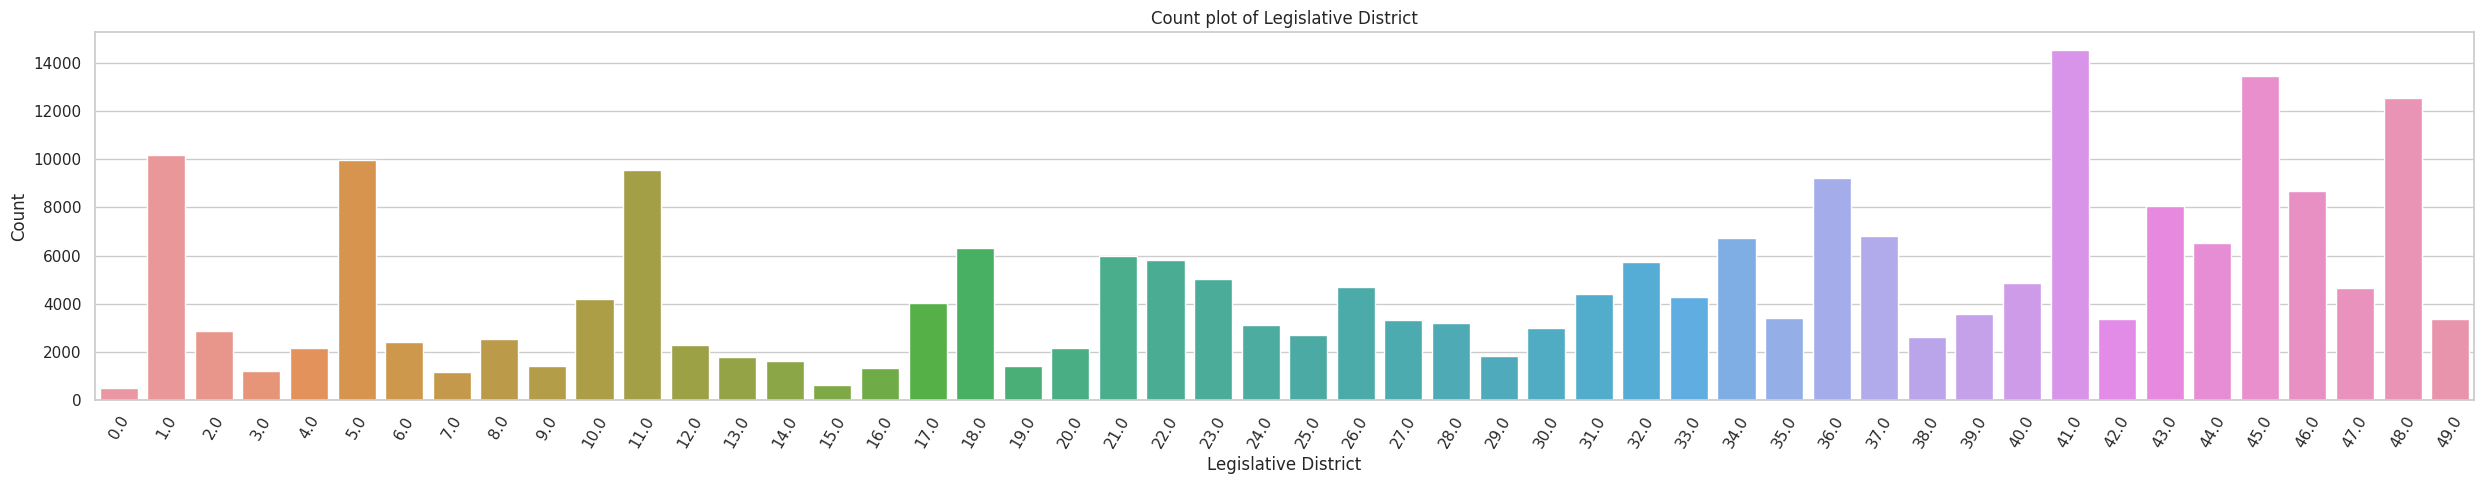

In [11]:
sns.set_context("notebook")
sns.set_style("whitegrid")

for features in cols:
    if features in df.columns:
        
        plt.figure(figsize=(25,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()

# Correlation Matrix(Heat-Map)

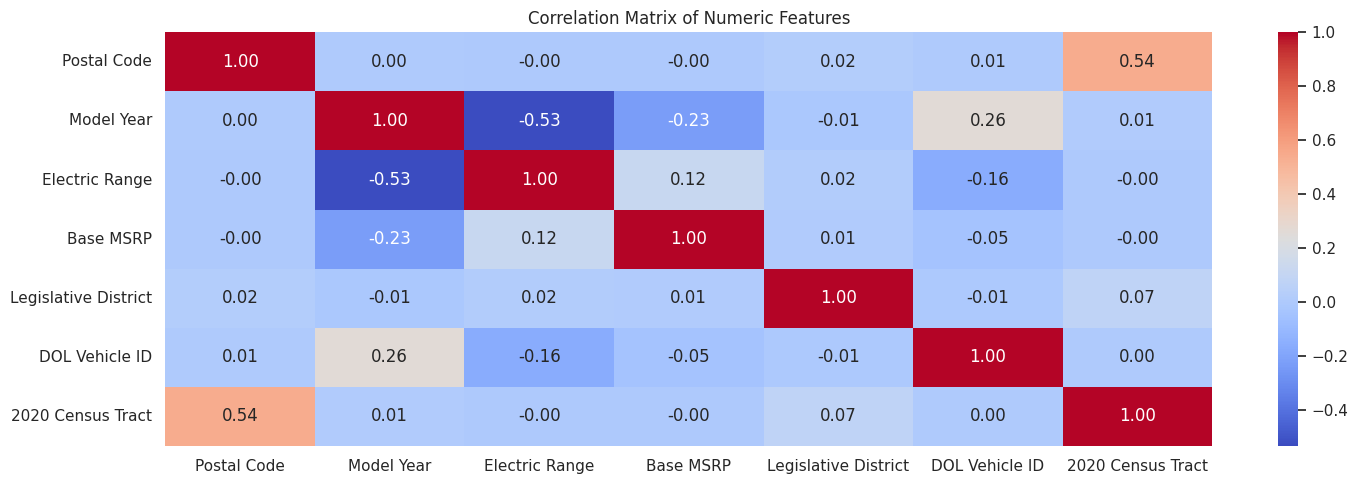

In [12]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

In [13]:
df['2020 Census Tract'] = df['2020 Census Tract'].astype(float).round(2)

# Model Section

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [15]:
X= df.drop(columns=['VIN (1-10)', 'County', 'City', 'State','Make', 'Model', 'Electric Vehicle Type',
                    'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location', 'Electric Utility'])
y = df['Base MSRP']

In [16]:
X.isna().sum()

Postal Code             0
Model Year              0
Electric Range          0
Base MSRP               0
Legislative District    0
DOL Vehicle ID          0
2020 Census Tract       0
dtype: int64

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

In [20]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [21]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

              Model  R2 Score           MSE       RMSE       MAE
0  LinearRegression    1.0000  0.000000e+00     0.0000    0.0000
1             Ridge    1.0000  0.000000e+00     0.0000    0.0000
2             Lasso    1.0000  3.000000e-04     0.0161    0.0023
3        ElasticNet    1.0000  0.000000e+00     0.0035    0.0005
4      DecisionTree    1.0000  0.000000e+00     0.0000    0.0000
5      RandomForest    1.0000  4.268190e+01     6.5331    0.0588
9           XGBoost    1.0000  6.250000e-02     0.2500    0.0022
7          AdaBoost    0.9986  7.271090e+04   269.6496   25.0513
6  GradientBoosting    0.9971  1.474030e+05   383.9310    2.0205
8        KNeighbors    0.0871  4.651646e+07  6820.2980  983.7388


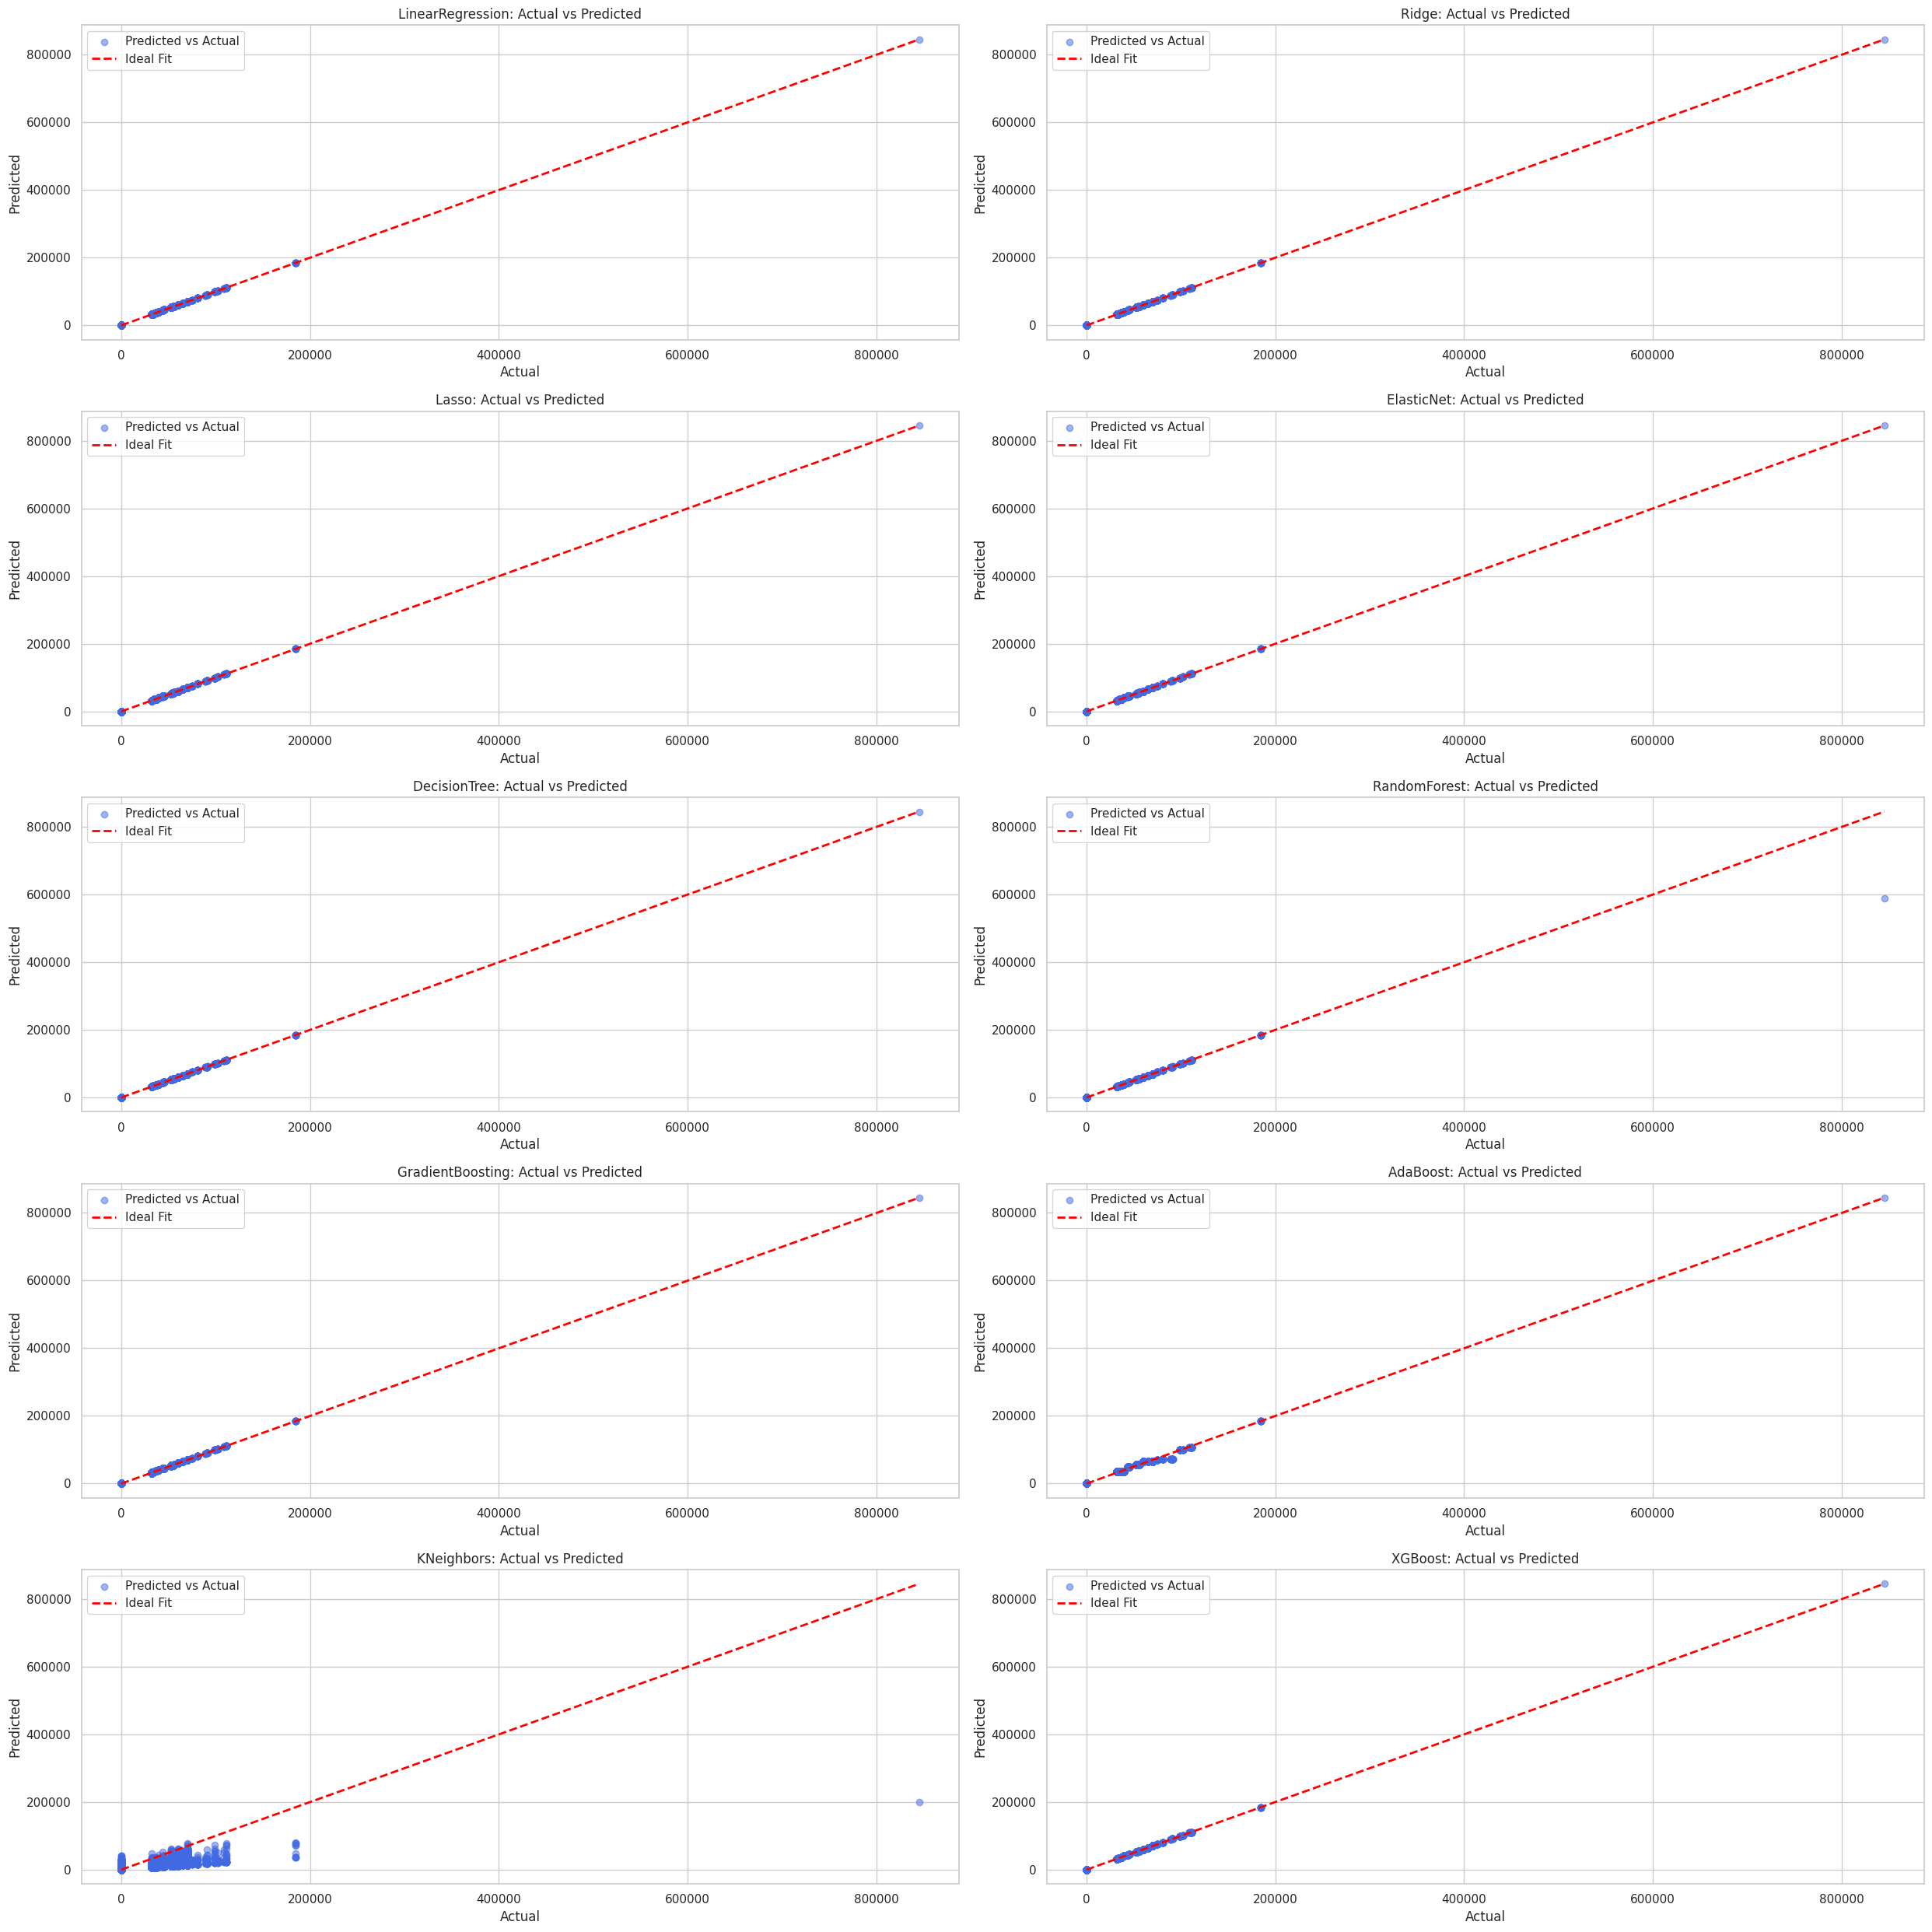

In [22]:
plt.figure(figsize=(25, 25))  # Resize the entire plot area

for i, (name, model) in enumerate(models.items(), 1):
    # Fit the model
    model.fit(X, y)

    # Predict
    y_pred = model.predict(X)

    # Plot
    plt.subplot(5, 2, i)
    plt.scatter(y, y_pred, alpha=0.5, label='Predicted vs Actual', color='royalblue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.legend()

plt.tight_layout()
plt.show()


# CONCLUSION:

> *Almost evey model giving the 100% results.***